In [1]:
#!/usr/bin/python3
# coding=utf-8

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import re

In [2]:
def ecliptic(n):
  """
  Return the sun's/planets' orbit
  """
  theta = np.linspace(0, 2 * np.pi, n)
  rad = -23.45 * np.sin(theta)
  return((theta,rad))
  
def is_numeric(string):
    """ 
    Returns True if string is a number.
    """
    try:
        float(string)
        return True
    except ValueError:
        return False

def raw_read(csv_file):
  """
  Read the comma sepparated value file with the 
  first line containing the column names.
  """
  with open(csv_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',', quotechar='"', skipinitialspace=True)
    data={}
    colnames=[]
    row_count = 0
    for row in csv_reader:
      if row_count == 0:
        colnames = row
        for name in row:
          data[name] = []
      else:
        for i, name in enumerate(colnames):
          data[name].append(row[i])
      row_count += 1
  return(data)

def coordString2decimal(string):
  """
  convert a string in the form of
  * (-)DD° MM' SS"
  * (-)HHh MMm SSs
  with the capital letters beeing numbers to a float
  """
  if is_numeric(string):
    return(float(string))
  elif string == '':
    return(0)

  negative = False
  if re.search("^-", string):
    negative = True
  
  if re.search("[°h]", string):
    a = re.split("[°h]", string)
    if a[0] == '':
      a[0] = 0
  else:
    a = []
    a.append(0)
    a.append(string)
    
  if re.search("[m'′`]", a[1]):
    b = re.split("[m'′`]", a[1])
    if b[0] == '':
      b[0] = 0
  else:
    b = []
    b.append(0)
    b.append(a[1])
    
  c = re.split('"|s', b[1])
  if c[0] == '':
    c[0] = 0
  if negative:
    return(float(a[0]) - float(b[0]) / 60 - float(c[0]) / 3600)
  else:
    return(float(a[0]) + float(b[0]) / 60 + float(c[0]) / 3600)

def type2color(string):
  if string == "galaxy":
    return("#FF0000")
  elif string == "globular cluster":
    return("#AA0000")
  elif string == "open cluster" or string == "double cluster":
    return("#660000")
  elif string == "double star":
    return("#00AA00")
  elif string == "nebula" or string == "open cluster + nebula":
    return("#5555FF")
  else:
    return("#00000099")

def type2marker(string):
  if string == "galaxy":
    return("o")
  elif string == "globular cluster":
    return("^")
  elif string == "open cluster" or string == "double cluster" or string == "open cluster + nebula":
    return("s")
  elif string == "double star":
    return("*")
  elif string == "nebula":
    return("d")
  else:
    return("p")

def figSetup():
  """
  Set up the polar grid and coordinate labels/ticks
  TODO: Add the year as second (outer) grid labels
  """
  ## theta limit, here 24h
  xmax = 24

  fig = plt.figure(figsize=(20,20))
  ax = fig.add_subplot(111, polar=True)

  ## set up the "degree"-grid + labels
  ylabels = [-75, -60, -30, 0, 30, 40]
  ax.set_yticks(ylabels)
  ax.set_yticklabels(["%d°" % -i for i in ylabels], fontsize=8)
  ax.set_rlim(-90, 46)
  ax.set_rlabel_position(180)

  ## set up the ticks on the theta-Axis ("x")
  theta = np.linspace(0, 2 * np.pi, xmax, endpoint=False)

  ## plot the hour coordinates
  xlabels = ["%dh" %i for i in range(0, xmax)]
  for i,t in enumerate(theta):
    r = 180 - np.rad2deg(theta[i])
    lab = ax.text(theta[i], 42, xlabels[i], size=10, rotation=r, ha='center', va='center', zorder=9)

  ax.set_xticks([])

  # Make the labels go clockwise
  ax.set_theta_direction(-1)

  # Place 0 at the top
  ax.set_theta_offset(np.pi/2.0)       

  thetaZwo = np.linspace(0, 2 * np.pi, 365, endpoint=False)
  dates = ['1'] + [''] + ['Jan'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + [''] + \
          ['1'] + [''] + ['Feb'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 8 + \
          ['1'] + [''] + ['Mar'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + [''] + \
          ['1'] + [''] + ['Apr'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + \
          ['1'] + [''] + ['Mai'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + [''] + \
          ['1'] + [''] + ['Jun'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + \
          ['1'] + [''] + ['Jul'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + [''] + \
          ['1'] + [''] + ['Aug'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + [''] + \
          ['1'] + [''] + ['Sep'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + \
          ['1'] + [''] + ['Oct'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + [''] + \
          ['1'] + [''] + ['Nov'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + \
          ['1'] + [''] + ['Dec'] + [''] * 6 + ['10'] + [''] * 9 + ['20'] + [''] * 9 + ['30'] + ['']

  ## 21 Mar at 12h,
  ## meaning that the date shows the culmination on the sout at midnight
  thetaZwo = thetaZwo + thetaZwo[1]/2
  dates= dates[262:366] + dates[0:262]

  ## ... or 21 Mar at 0h,
  ## coresponds to culmination at noon
  #dates = dates[79:366] + dates[0:79]
  
  for i,t in enumerate(thetaZwo):
    r = 360 - np.rad2deg(t)
    lab = ax.text(t, 44, dates[i], size=6, rotation=r, ha='center', va='center', zorder=9)
    if dates[i] == '1' or dates[i] == '10' or dates[i] == '20' or dates[i] == '30':
      ax.plot([t,t], [45, 46], color="#CCCCCC", linewidth=1, linestyle='solid', zorder=2)
    else:
      ax.plot([t,t], [45.5, 46], color="#CCCCCC", linewidth=1, linestyle='solid', zorder=2)

  ## draw the theta-grid (major: solid; minor: dotted)
  for h in theta:
    ax.plot([h,h], [-75, 40], color="#CCCCCC", linewidth=1, linestyle='solid', zorder=2)
    ax.plot([h + np.pi/xmax,h + np.pi/xmax], [-60, 40], color="#CCCCCC", linewidth=1, linestyle='dotted', zorder=1)

  ## draw minor (dotted) "degree"-grid
  theta = np.linspace(0, 2 * np.pi, 4 * xmax)
  z=3
  for y in [-45, -15, 15]:
    ax.plot(theta, np.zeros(4*xmax) + y, color="#CCCCCC", linewidth=1, linestyle='dotted', zorder=z)
    z = z + 1

  fig.tight_layout()
    
  return((fig,ax))

<IPython.core.display.Javascript object>


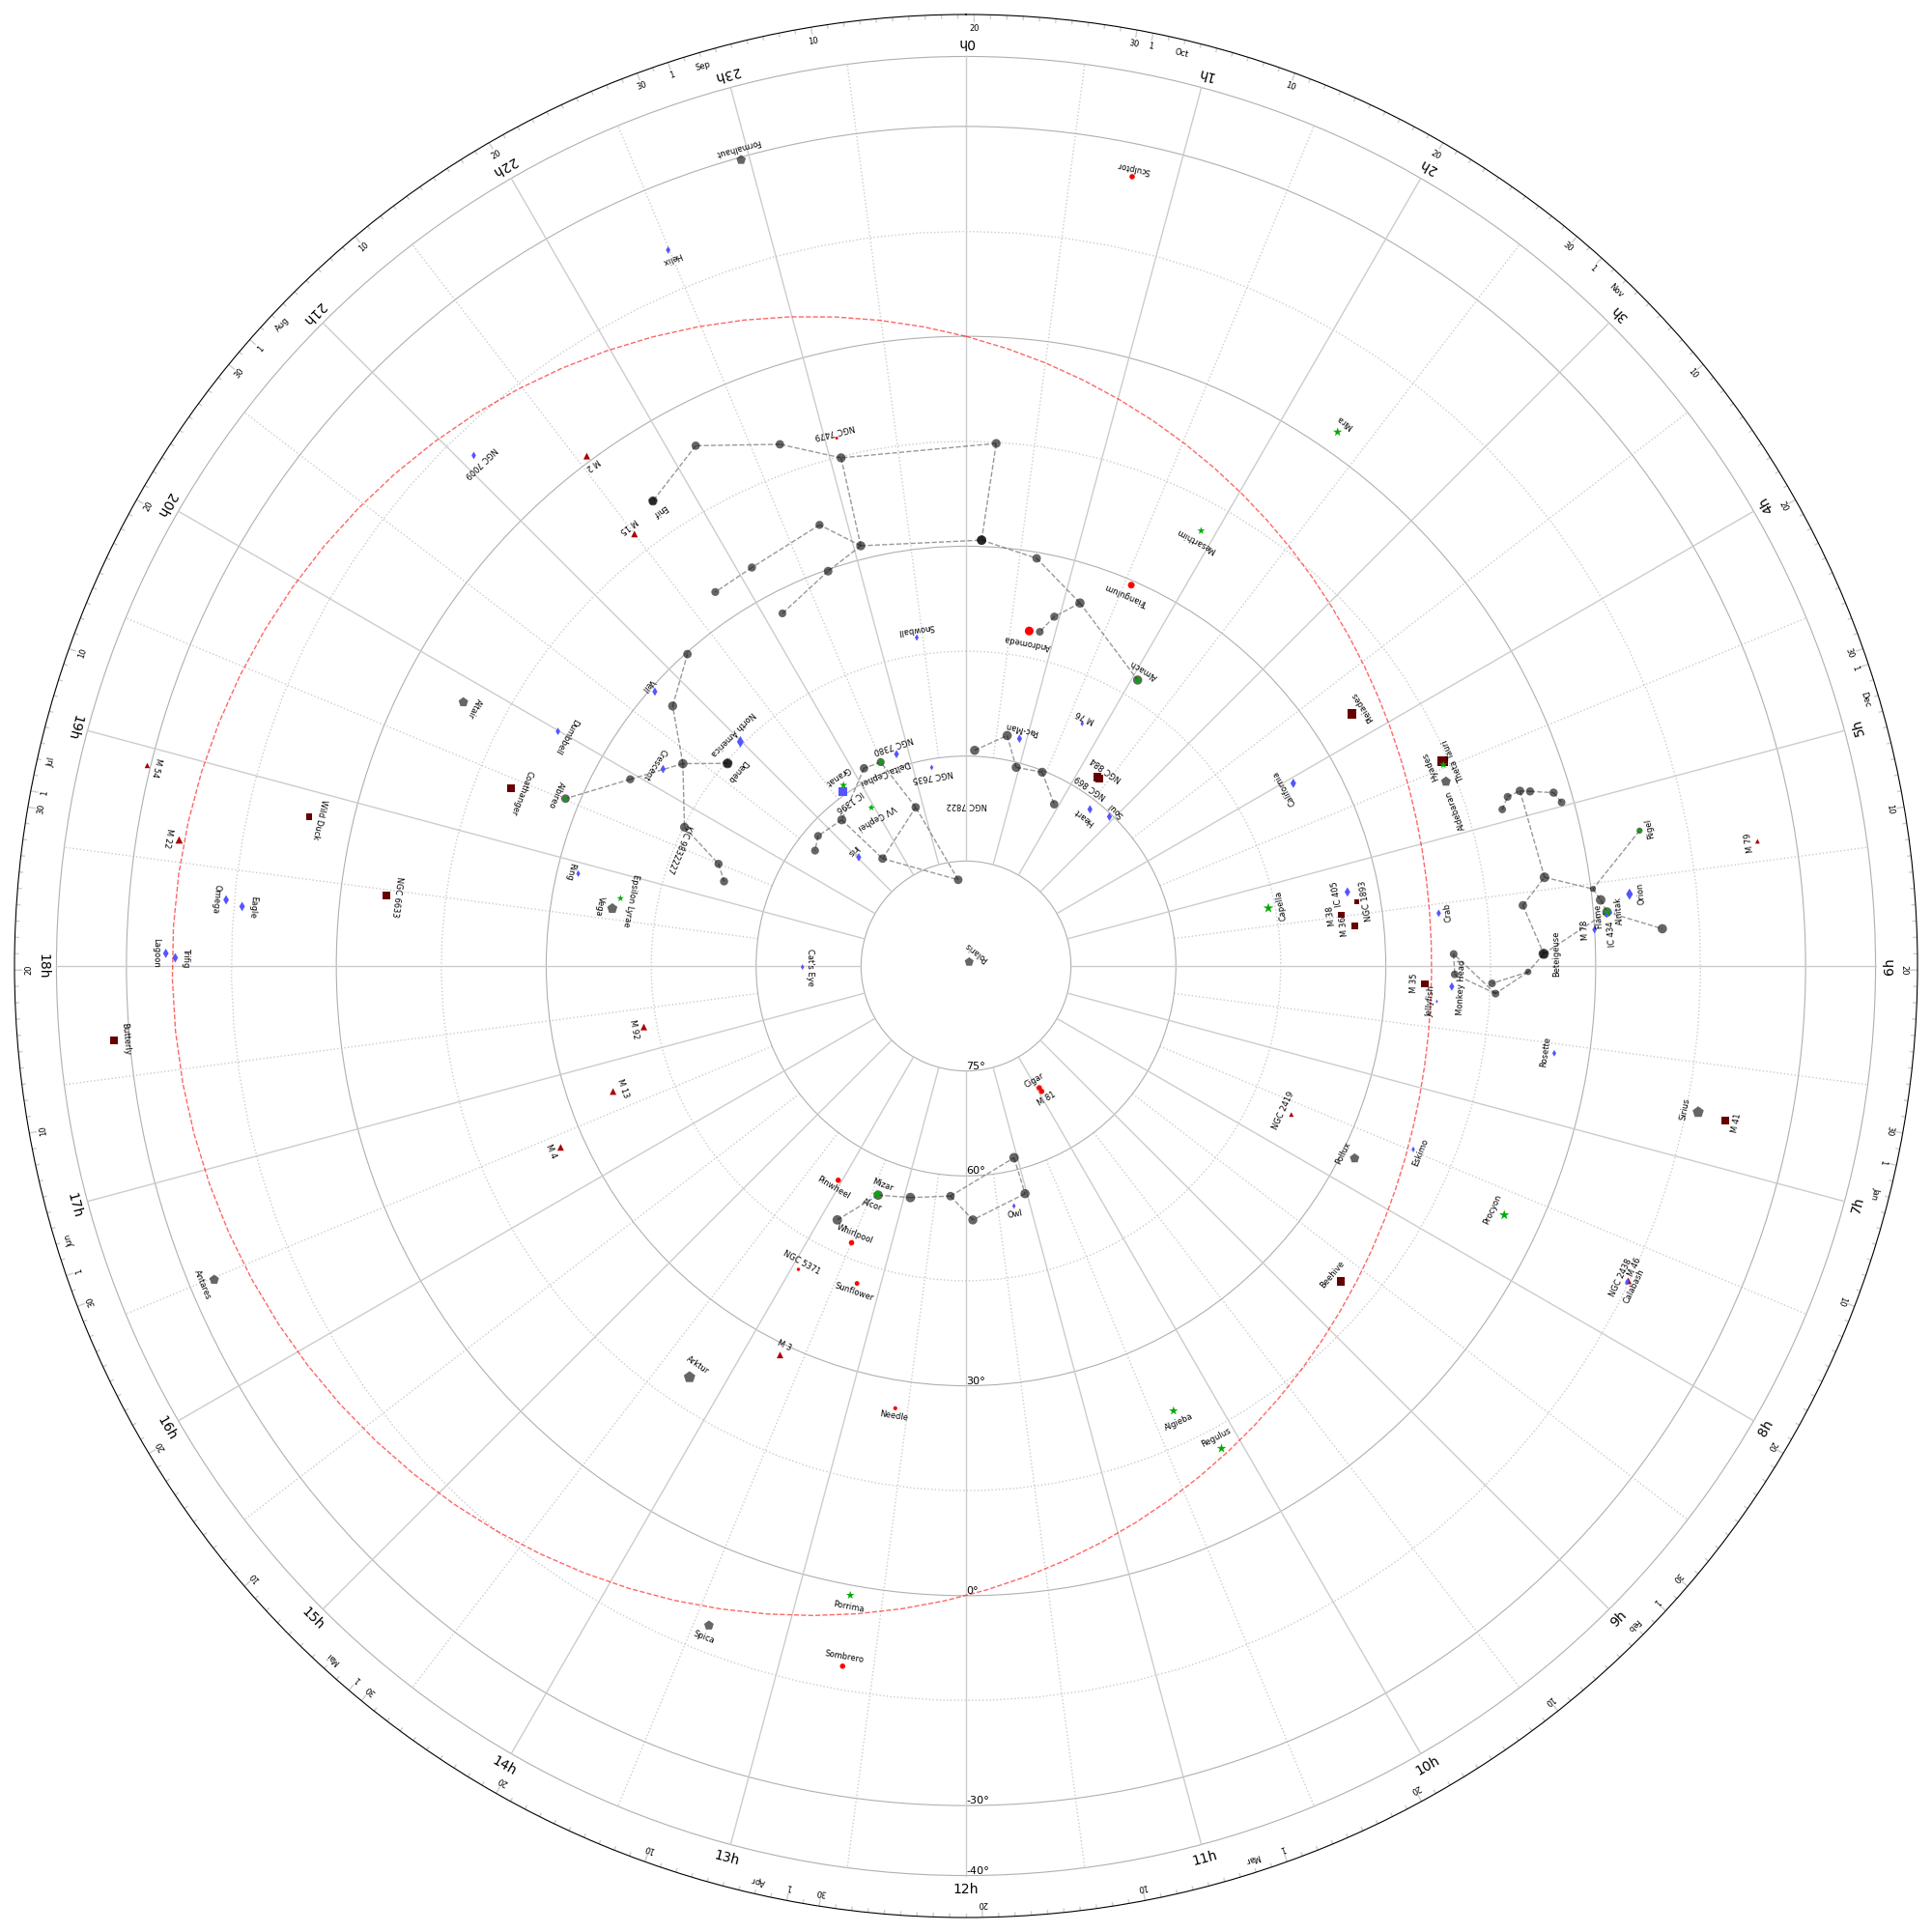

In [3]:

data = raw_read('data/objects.csv')

data['RA']   = [coordString2decimal(data['RA'][i]) for i in range(len(data['Name']))]
data['dec']  = [coordString2decimal(data['dec'][i]) for i in range(len(data['Name']))]
data['size'] = [coordString2decimal(data['size'][i]) for i in range(len(data['Name']))]
data['amag'] = [float(data['amag'][i]) for i in range(len(data['Name']))]

amagmax = max(data['amag'])
amagmin = min(data['amag'])

fig, ax = figSetup()

(theta, rad) = ecliptic(96)
ax.plot(theta, rad, linewidth=1, linestyle='dashed', color="#FF000099", zorder=25)

## points
theta   = [x * np.pi / 12 for x in data['RA']]
rad     = [-y for y in data['dec']]
size    = [(amagmax - s + 1)**2 / 4 for s in data['amag']]
colors  = [type2color(s) for s in data['Type']]
markers = [type2marker(s) for s in data['Type']]

# points
for i,txt in enumerate(data['Name']):
  points = ax.scatter(theta[i], rad[i], size[i], colors[i], marker=markers[i], edgecolor='none', zorder=99)

for i,txt in enumerate(data['Name']):
  txt = re.sub(r' \(.*','', txt)
  if txt == 'IC 434':
    x = theta[i] + np.sin(theta[i]) * 0.033
    y = rad[i]
  elif txt == 'Polaris':
    x = theta[i]
    y = rad[i] + 0.66 * size[i]**0.25
  elif txt == 'Aldebaran':
    x = theta[i] + np.sin(theta[i]) * 0.063
    y = rad[i]
  elif txt == 'M 46':
    x = theta[i] - np.sin(theta[i]) * 0.023
    y = rad[i]
  else:
    x = theta[i]
    y = rad[i] + (i%2*2-1) * 0.66 * size[i]**0.25
  r = 180 - np.rad2deg(theta[i])
  lab = ax.text(x, y, txt, size=6, rotation=r, ha='center', va='center', zorder=999)
  
with open('data/constellations.json') as f:
    constellations = json.load(f)

for c in constellations:
  theta = [np.pi * x / 12 for x in c['stars']['RA']]
  rad   = [-y  for y in c['stars']['dec']]
  size  = [(amagmax - s + 1)**2 / 4 for s in c['stars']['amag']]
  ax.scatter(theta, rad, size, '#00000099', edgecolor='none', zorder=55)
  for i in range(len(c['connections']['from'])):
      idfrom = c['connections']['from'][i]
      idto = c['connections']['to'][i]
      theta = [np.pi / 12 * c['stars']['RA'][idfrom],
               np.pi / 12 * c['stars']['RA'][idto]]
      rad = [- c['stars']['dec'][idfrom],
             - c['stars']['dec'][idto]]
      ax.plot(theta, rad, linewidth=1, linestyle='dashed', color="#55555599", zorder=50)

plt.show()
